In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

# Tabulation

In [ ]:
import urllib.request
import json

In [ ]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7fe77eece160>)

In [ ]:
with open('data.json') as f:
    data = json.load(f)

In [ ]:
data = data['states_daily']
data = pd.json_normalize(data)

In [ ]:
data.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   an      414 non-null    object        
 1   ap      414 non-null    object        
 2   ar      414 non-null    object        
 3   as      414 non-null    object        
 4   br      414 non-null    object        
 5   ch      414 non-null    object        
 6   ct      414 non-null    object        
 7   date    414 non-null    datetime64[ns]
 8   dd      414 non-null    object        
 9   dl      414 non-null    object        
 10  dn      414 non-null    object        
 11  ga      414 non-null    object        
 12  gj      414 non-null    object        
 13  hp      414 non-null    object        
 14  hr      414 non-null    object        
 15  jh      414 non-null    object        
 16  jk      414 non-null    object        
 17  ka      414 non-null    object        
 18  kl      41

In [ ]:
data['status'].unique()

array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [ ]:
data = data[data['status'] == 'Confirmed']

In [ ]:
data.drop('status', axis = 1, inplace = True)

In [ ]:
data = data.apply(pd.to_numeric)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 411
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   an      138 non-null    int64         
 1   ap      138 non-null    int64         
 2   ar      138 non-null    int64         
 3   as      138 non-null    int64         
 4   br      138 non-null    int64         
 5   ch      138 non-null    int64         
 6   ct      138 non-null    int64         
 7   date    138 non-null    datetime64[ns]
 8   dd      138 non-null    int64         
 9   dl      138 non-null    int64         
 10  dn      138 non-null    int64         
 11  ga      138 non-null    int64         
 12  gj      138 non-null    int64         
 13  hp      138 non-null    int64         
 14  hr      138 non-null    int64         
 15  jh      138 non-null    int64         
 16  jk      138 non-null    int64         
 17  ka      138 non-null    int64         
 18  kl      13

In [ ]:
data.set_index('date', inplace = True)

In [ ]:
data.head(5)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


## Styling Tabulation

In [ ]:
data.head(5).style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14 00:00:00,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17 00:00:00,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18 00:00:00,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


In [ ]:
data.tail(5).style.highlight_max(color = 'red').highlight_min(color = 'green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,0,1142,37,146,1081,95,783,277,523,5072,1103,30,0,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,50072,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,0,1075,49,175,1110,127,794,508,615,5199,927,9,0,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,48932,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,0,613,36,258,1052,94,795,454,470,5324,702,21,0,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,46484,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,0,1056,44,168,1108,60,749,760,489,5536,1167,21,0,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,49631,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,0,1035,38,202,1144,73,755,331,540,5503,903,20,0,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,52479,0,3383,279,2294


In [ ]:
df = data.tail(5)

In [ ]:
def bold_max_cols(x):
    ismax = (x == x.max())
    return ['font-weight: bold' if y else '' for y in ismax]

In [ ]:
df.style.apply(bold_max_cols)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,0,1142,37,146,1081,95,783,277,523,5072,1103,30,0,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,50072,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,0,1075,49,175,1110,127,794,508,615,5199,927,9,0,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,48932,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,0,613,36,258,1052,94,795,454,470,5324,702,21,0,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,46484,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,0,1056,44,168,1108,60,749,760,489,5536,1167,21,0,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,49631,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,0,1035,38,202,1144,73,755,331,540,5503,903,20,0,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,52479,0,3383,279,2294


In [ ]:
df.drop(['tt','dd','ld'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.style.apply(bold_max_cols).highlight_min(color = 'green')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,1142,37,146,1081,95,783,277,523,5072,1103,30,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,1075,49,175,1110,127,794,508,615,5199,927,9,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,613,36,258,1052,94,795,454,470,5324,702,21,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,1056,44,168,1108,60,749,760,489,5536,1167,21,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,1035,38,202,1144,73,755,331,540,5503,903,20,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,0,3383,279,2294


In [ ]:
df.style.background_gradient(cmap = 'Reds')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,1142,37,146,1081,95,783,277,523,5072,1103,30,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,1075,49,175,1110,127,794,508,615,5199,927,9,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,613,36,258,1052,94,795,454,470,5324,702,21,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,1056,44,168,1108,60,749,760,489,5536,1167,21,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,1035,38,202,1144,73,755,331,540,5503,903,20,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,0,3383,279,2294


In [ ]:
df.style.background_gradient(cmap = 'Reds', axis = 1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,1142,37,146,1081,95,783,277,523,5072,1103,30,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,1075,49,175,1110,127,794,508,615,5199,927,9,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,613,36,258,1052,94,795,454,470,5324,702,21,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,1056,44,168,1108,60,749,760,489,5536,1167,21,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,1035,38,202,1144,73,755,331,540,5503,903,20,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,0,3383,279,2294


In [ ]:
df.style.background_gradient(cmap = 'Reds', subset = ['mh', 'dl', 'tn'])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,1142,37,146,1081,95,783,277,523,5072,1103,30,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,1075,49,175,1110,127,794,508,615,5199,927,9,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,613,36,258,1052,94,795,454,470,5324,702,21,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,1056,44,168,1108,60,749,760,489,5536,1167,21,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,1035,38,202,1144,73,755,331,540,5503,903,20,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,0,3383,279,2294


In [ ]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-25 00:00:00,31,7813,70,1165,2803,29,363,1142,37,146,1081,95,783,277,523,5072,1103,30,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,0,2971,244,2404
2020-07-26 00:00:00,28,7627,32,1142,2605,35,431,1075,49,175,1110,127,794,508,615,5199,927,9,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,0,3246,143,2341
2020-07-27 00:00:00,20,6051,81,1348,2192,23,367,613,36,258,1052,94,795,454,470,5324,702,21,7924,36,51,789,0,46,1503,551,85,1134,10,1473,6993,147,0,3505,224,2112
2020-07-28 00:00:00,25,7948,91,1371,2480,24,306,1056,44,168,1108,60,749,760,489,5536,1167,21,7717,41,31,628,23,75,1215,609,139,1072,24,1610,6972,221,0,3458,259,2134
2020-07-29 00:00:00,65,10093,80,1348,2328,44,314,1035,38,202,1144,73,755,331,540,5503,903,20,9211,5,141,917,11,53,1068,568,166,1144,17,1764,6426,216,0,3383,279,2294


In [ ]:
df_ = df[['mh', 'tn', 'dl']]

In [ ]:
df_.style.bar()

,mh,tn,dl
date,,,
2020-07-25 00:00:00,9251,6988,1142
2020-07-26 00:00:00,9431,6986,1075
2020-07-27 00:00:00,7924,6993,613
2020-07-28 00:00:00,7717,6972,1056
2020-07-29 00:00:00,9211,6426,1035


In [ ]:
df_.style.bar(subset = ['mh'], color = 'red').bar(subset = ['tn'], color = 'orange').bar(subset = 'dl', color = 'green')

,mh,tn,dl
date,,,
2020-07-25 00:00:00,9251,6988,1142
2020-07-26 00:00:00,9431,6986,1075
2020-07-27 00:00:00,7924,6993,613
2020-07-28 00:00:00,7717,6972,1056
2020-07-29 00:00:00,9211,6426,1035


# Distribution of Data

## Distribution of Single Continuous variable

### Histogram

In [ ]:
x = np.random.normal(size = 1000)

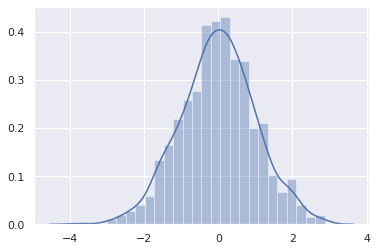

In [ ]:
sns.distplot(x);

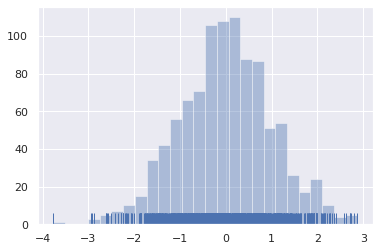

In [ ]:
sns.distplot(x, kde = False, rug = True);

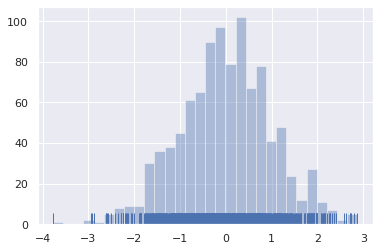

In [ ]:
sns.distplot(x, kde = False, rug = True, bins = 30);

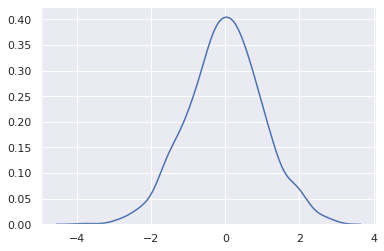

In [ ]:
sns.kdeplot(x);

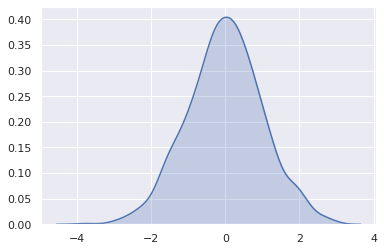

In [ ]:
sns.kdeplot(x, shade = True);

In [ ]:
y = np.random.uniform(size = 1000)

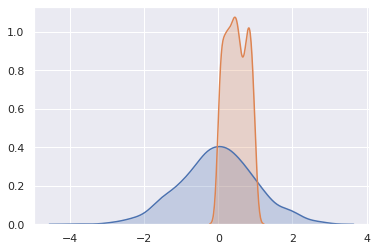

In [ ]:
sns.kdeplot(x, shade = True)
sns.kdeplot(y, shade = True);

In [ ]:
dia = sns.load_dataset("diamonds")

In [ ]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
dia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

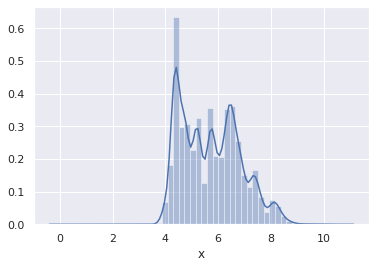

In [ ]:
sns.distplot(dia.x);

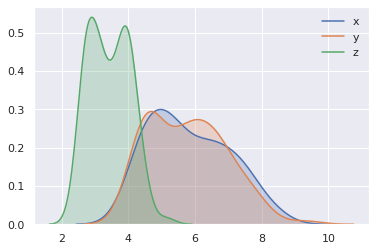

In [ ]:
sns.kdeplot(dia.sample(100).x, shade = True)
sns.kdeplot(dia.sample(100).y, shade = True)
sns.kdeplot(dia.sample(100).z, shade = True)

### Box Plot

In [ ]:
x = np.random.normal(size = 1000)

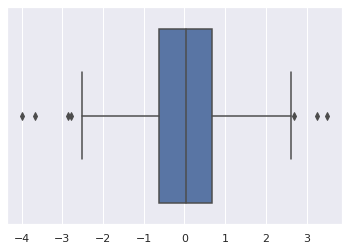

In [ ]:
sns.boxplot(x, whis = 1.5);

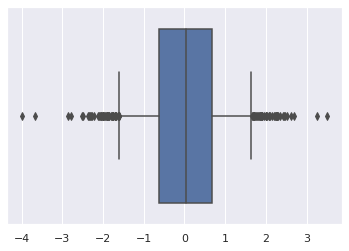

In [ ]:
sns.boxplot(x, whis = 0.75); #1.5 is default

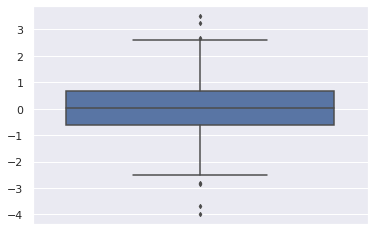

In [ ]:
sns.boxplot(x, whis = 1.5, fliersize = 3, orient = 'v');

### Boxen Plot

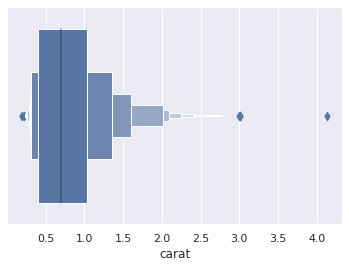

In [ ]:
sns.boxenplot(dia.sample(5000).carat);

## Distribution of Categorical value

In [ ]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
dcut = dia.groupby('cut')['cut'].count()

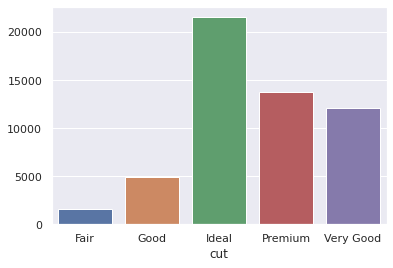

In [ ]:
sns.barplot(x = dcut.index, y = dcut.values);

In [ ]:
dclarity = dia.groupby('clarity')['clarity'].count()

In [ ]:
dclarity.head()

clarity
I1       741
IF      1790
SI1    13065
SI2     9194
VS1     8171
Name: clarity, dtype: int64

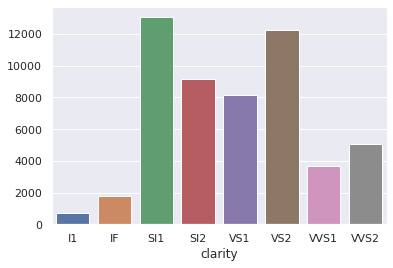

In [ ]:
sns.barplot(x = dclarity.index, y = dclarity.values);

## Joint Distribution of 2 variables

### Joint plot

In [ ]:
x = np.random.normal(size = 500)
y = np.random.normal(size = 500)

In [ ]:
df = pd.DataFrame({'x':x, 'y':y})

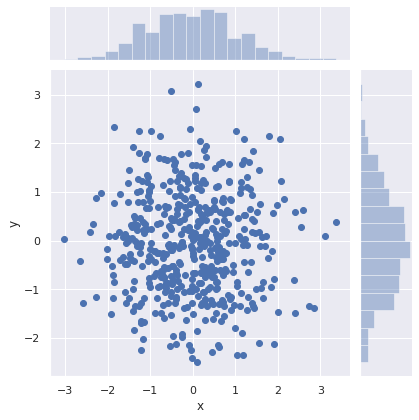

In [ ]:
sns.jointplot('x', 'y', data = df);

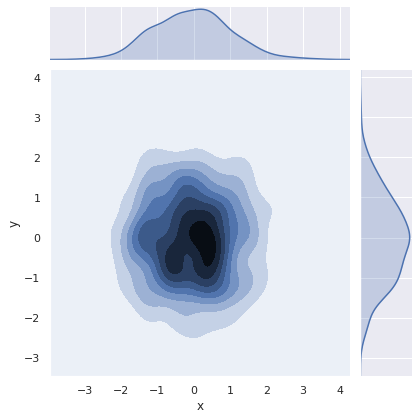

In [ ]:
sns.jointplot('x', 'y', data = df, kind = 'kde');

In [ ]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


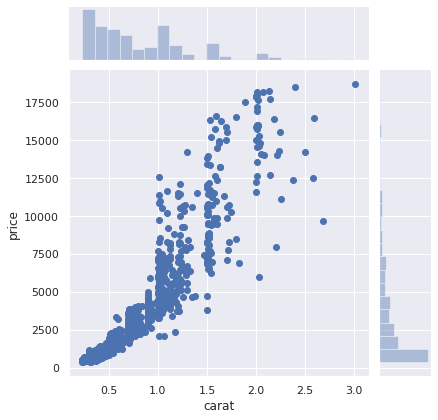

In [ ]:
sns.jointplot('carat', 'price', data = dia.sample(1000));

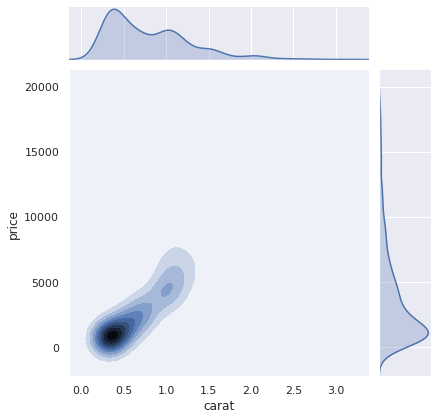

In [ ]:
sns.jointplot('carat', 'price', data = dia.sample(1000), kind = 'kde');

### Swarm Plot

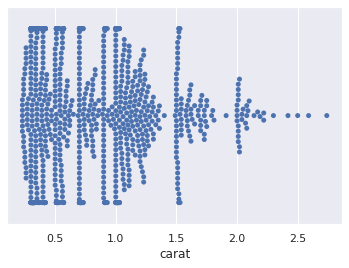

In [ ]:
sns.swarmplot(dia.sample(1000).carat);

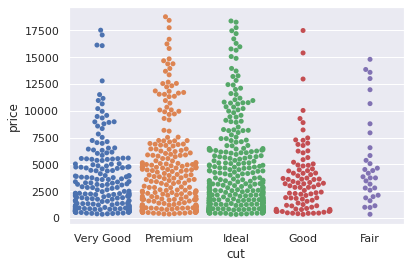

In [ ]:
sns.swarmplot('cut', 'price', data = dia.sample(1000));

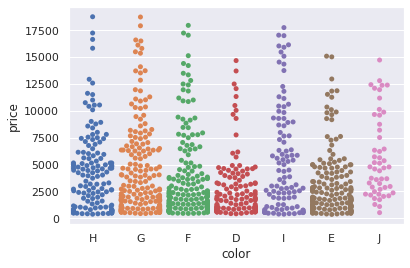

In [ ]:
sns.swarmplot('color', 'price', data = dia.sample(1000));

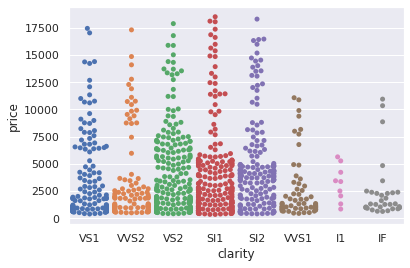

In [ ]:
sns.swarmplot('clarity', 'price', data = dia.sample(1000));

In [ ]:
p = sns.load_dataset("penguins")

In [ ]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
p.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
p.dropna(inplace = True)

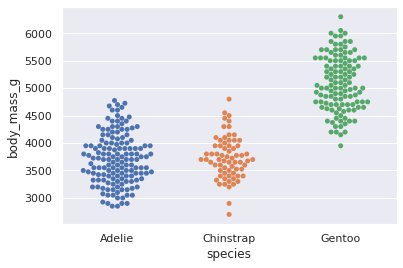

In [ ]:
sns.swarmplot('species', 'body_mass_g', data = p);

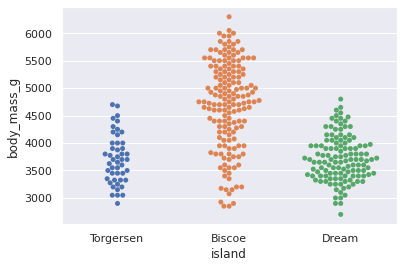

In [ ]:
sns.swarmplot('island', 'body_mass_g', data = p);

### Violin Plot

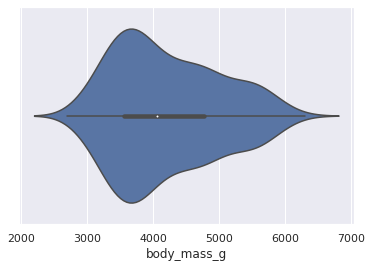

In [ ]:
sns.violinplot(x = 'body_mass_g', data = p);

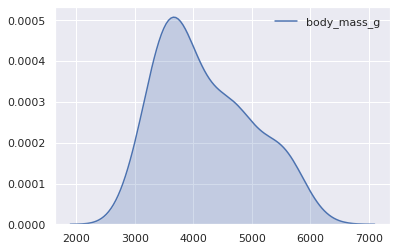

In [ ]:
sns.kdeplot(p['body_mass_g'], shade = True);

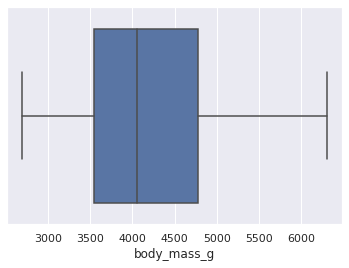

In [ ]:
sns.boxplot(x = 'body_mass_g', data = p);

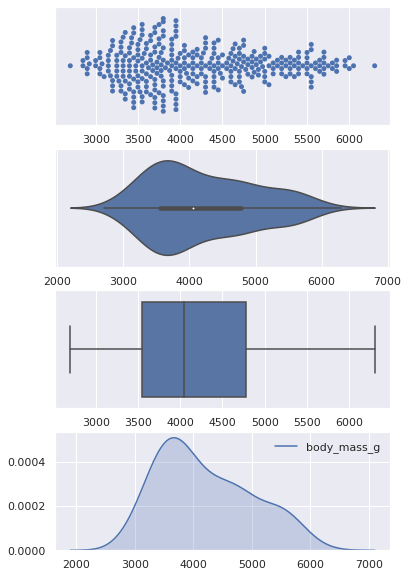

In [ ]:
fig, axs = plt.subplots(nrows = 4)
fig.set_size_inches(6, 10)
sns.swarmplot(x = 'body_mass_g', data = p, ax = axs[0]);
sns.violinplot(x = 'body_mass_g', data = p, ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p, ax = axs[2]);
sns.kdeplot(p['body_mass_g'], shade = True, ax = axs[3]);

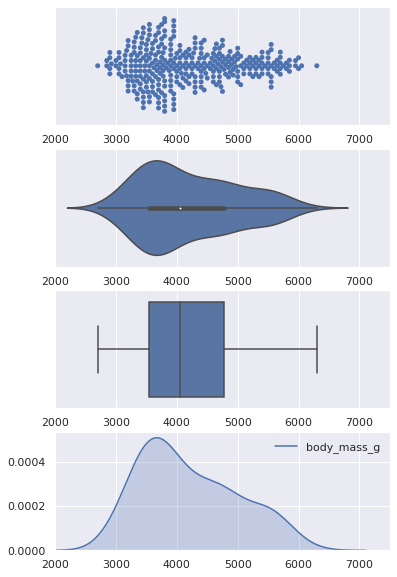

In [ ]:
fig, axs = plt.subplots(nrows = 4)
fig.set_size_inches(6, 10)
sns.swarmplot(x = 'body_mass_g', data = p, ax = axs[0]).set(xlim = (2000, 7500));
sns.violinplot(x = 'body_mass_g', data = p, ax = axs[1]).set(xlim = (2000, 7500));
sns.boxplot(x = 'body_mass_g', data = p, ax = axs[2]).set(xlim = (2000, 7500));
sns.kdeplot(p['body_mass_g'], shade = True, ax = axs[3]).set(xlim = (2000, 7500));

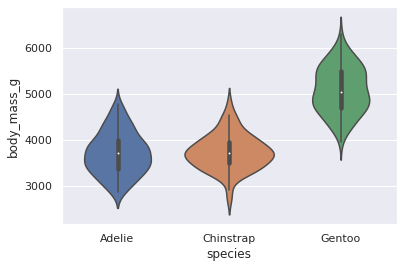

In [ ]:
sns.violinplot('species', 'body_mass_g', data = p);

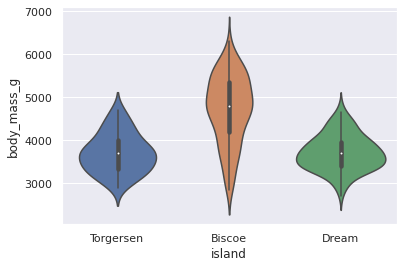

In [ ]:
sns.violinplot('island', 'body_mass_g', data = p);

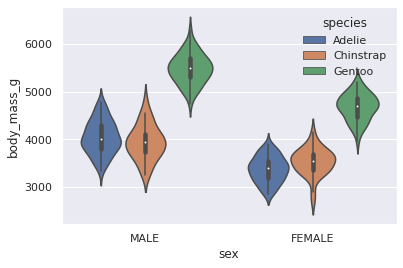

In [ ]:
sns.violinplot('sex', 'body_mass_g', hue = 'species', data = p);

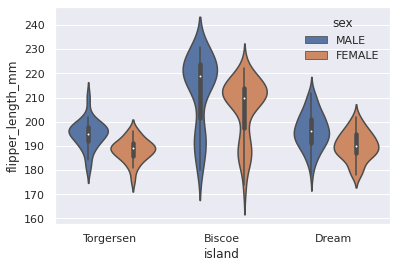

In [ ]:
sns.violinplot('island', 'flipper_length_mm', hue = 'sex', data = p);

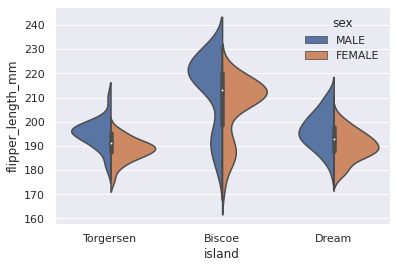

In [ ]:
sns.violinplot('island', 'flipper_length_mm', hue = 'sex', split = 'True', data = p);

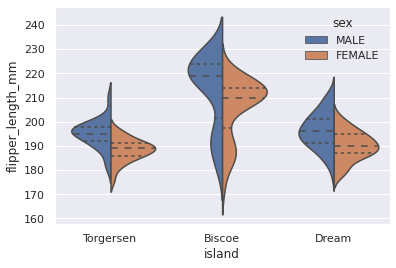

In [ ]:
sns.violinplot('island', 'flipper_length_mm', 
               hue = 'sex', split = 'True',
               inner = 'quartile', data = p);

In [ ]:
p.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

In [ ]:
p.binary_species.unique()

array(['Adelie | Chinstrap', 'Gentoo'], dtype=object)

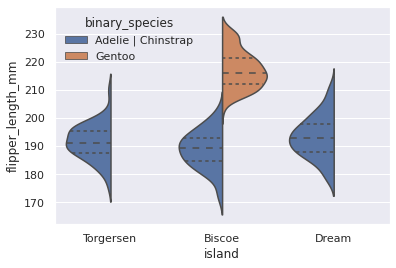

In [ ]:
sns.violinplot('island', 'flipper_length_mm', 
               hue = 'binary_species', inner = 'quartile', split = 'True', data = p);

### Faceted Plotting

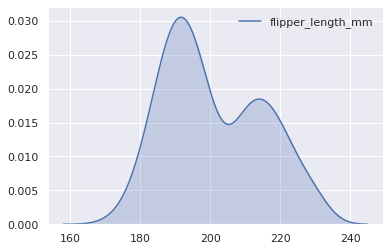

In [ ]:
sns.kdeplot(p.flipper_length_mm, shade = True);

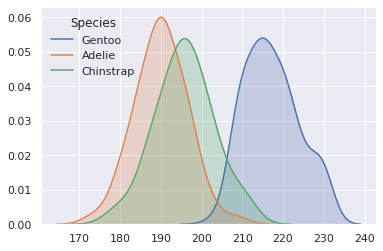

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade = True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade = True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade = True);
plt.legend(title = "Species", labels = ['Gentoo', 'Adelie', 'Chinstrap']);

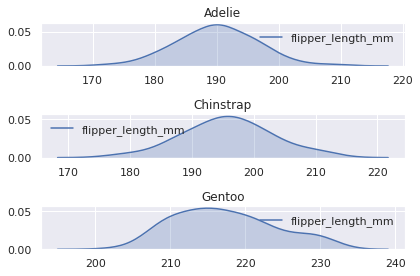

In [ ]:
column_name = 'species'
nrows = len(p[column_name].unique())
fig, axs = plt.subplots(nrows = nrows)
i = 0
for cv in p[column_name].unique():
    sns.kdeplot(p[p[column_name] == cv].flipper_length_mm, shade = True, ax = axs[i]).set_title(cv);
    i = i + 1
plt.tight_layout()

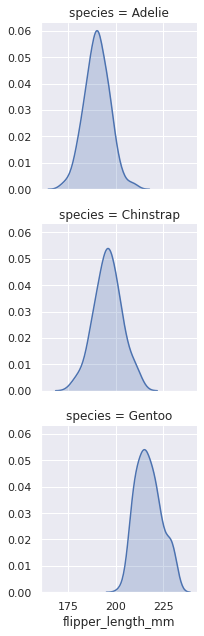

In [128]:
g = sns.FacetGrid(p, row = 'species');
g.map(sns.kdeplot, 'flipper_length_mm', shade =True)

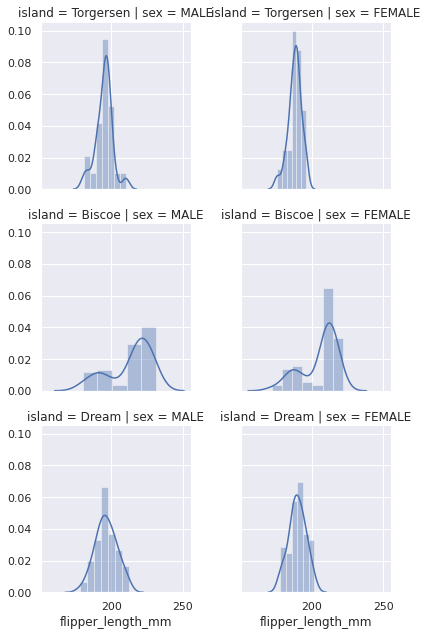

In [133]:
g = sns.FacetGrid(p, row = 'island', col = 'sex');
g.map(sns.distplot, 'flipper_length_mm');

### Pair Plot

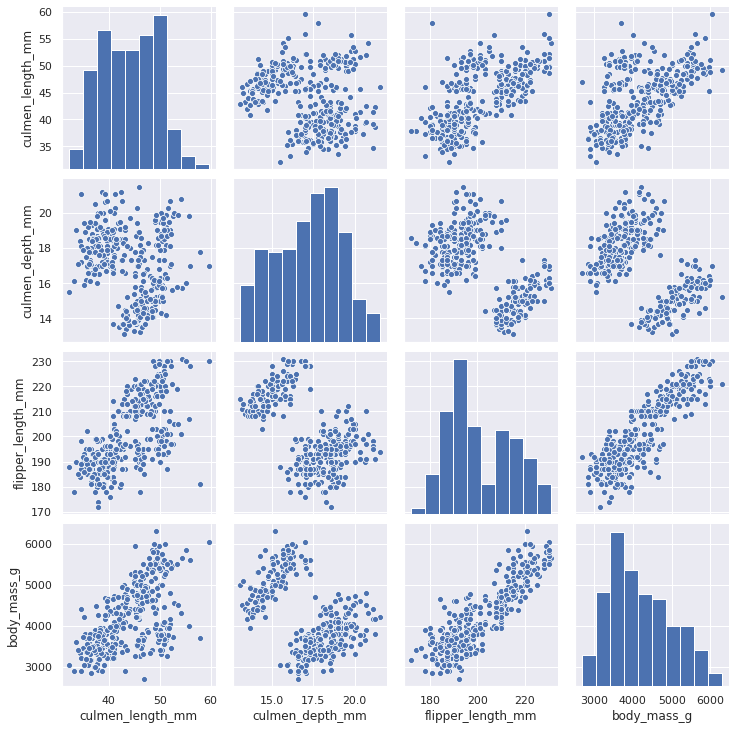

In [134]:
sns.pairplot(p);

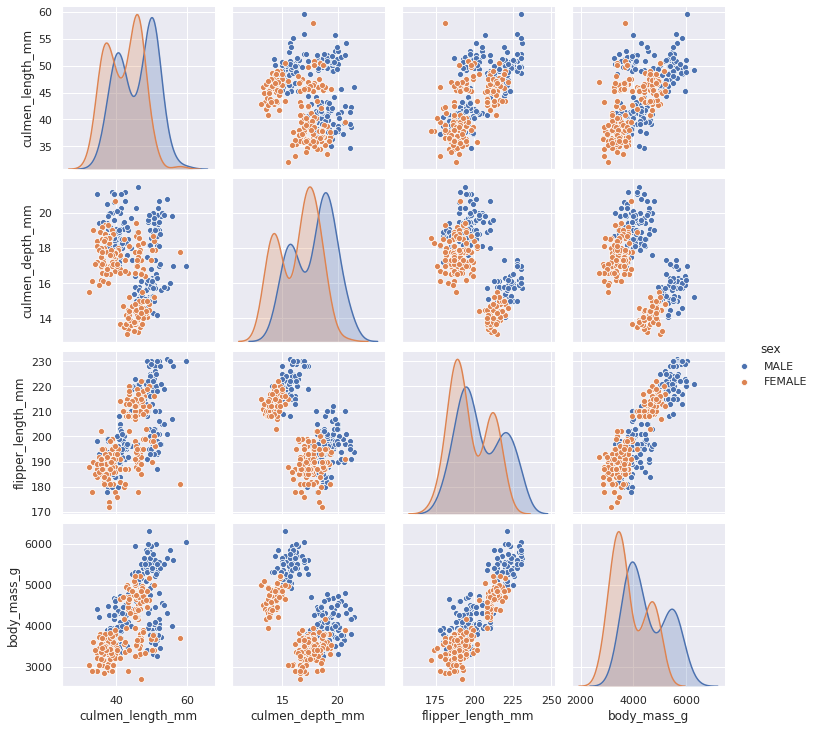

In [135]:
sns.pairplot(p, hue = 'sex');

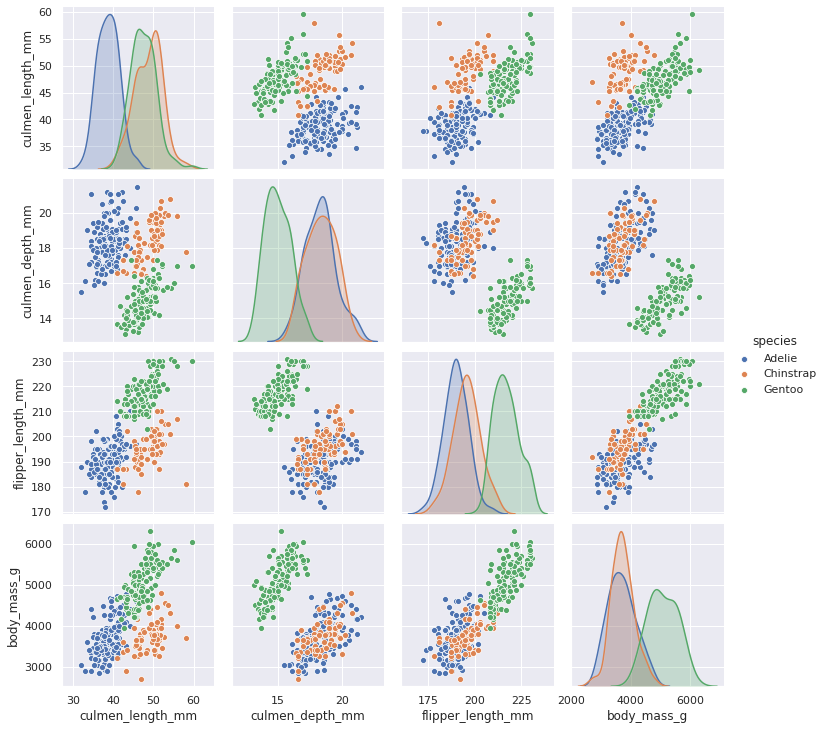

In [136]:
sns.pairplot(p , hue = 'species')

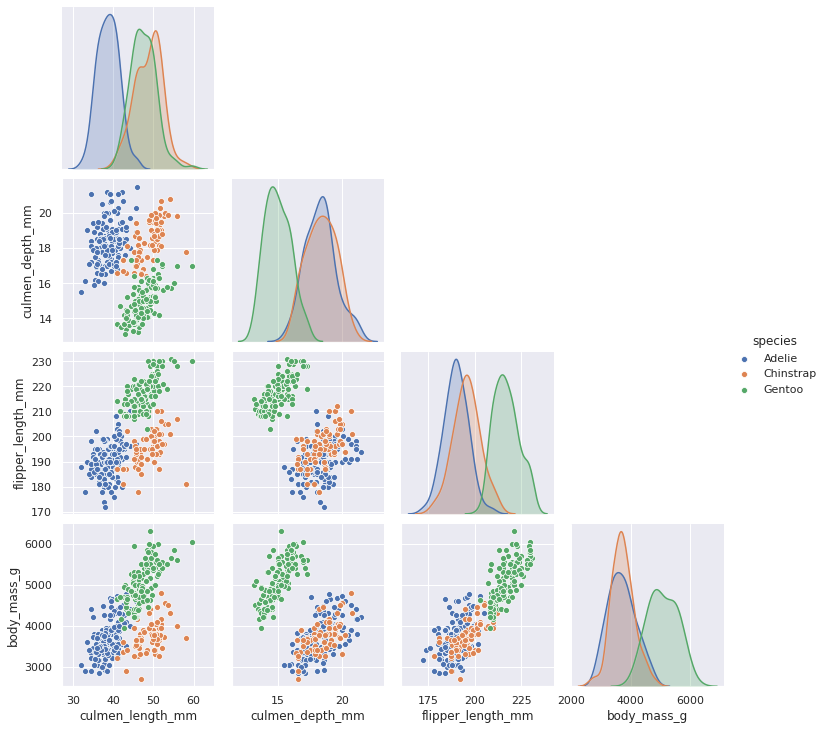

In [138]:
sns.pairplot(p, hue = 'species', corner = True);